In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision.transforms import ToPILImage
from PIL import Image
from sklearn.metrics import classification_report
from operator import itemgetter
from torchvision.transforms import Resize, Compose, ToTensor, Normalize, RandomResizedCrop
from transformers import AutoFeatureExtractor
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
import matplotlib.ticker as ticker
from transformers import AutoFeatureExtractor
from torch.utils.data import Dataset, DataLoader
import os
from transformers import DefaultDataCollator
import evaluate
from transformers import ViTImageProcessor
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from transformers import AutoConfig, TFAutoModelForTableQuestionAnswering
from transformers import ViTForImageClassification
from transformers import AdamW
from torch.utils.data import DataLoader
import torch
from torch.nn.functional import softmax
from transformers import ViTForImageClassification, ViTFeatureExtractor
from transformers import TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import DefaultDataCollator


2024-04-29 18:57:58.658067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 18:57:58.658174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 18:57:58.659694: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 18:57:58.668722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 18:57:59.989682: W tensorflow/compiler/tf2

In [2]:
dataset = load_dataset("citeseerx/ACL-fig")

Resolving data files:   0%|          | 0/2673 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/334 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/335 [00:00<?, ?it/s]

In [3]:
train_ds = dataset['train']
val_ds = dataset['validation']
test_ds = dataset['test']

In [4]:
dataset["train"][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=550x442>,
 'label': 0}

In [5]:

checkpoint = "google/vit-large-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-large-patch16-224-in21k')
model = ViTForImageClassification.from_pretrained('google/vit-large-patch16-224-in21k')  # Load with default classifier
model.classifier = torch.nn.Linear(model.config.hidden_size, 19)


image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

transforms_ = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])


/home/z1974769/.conda/envs/condavisionenv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-large-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
feature_extractor, image_processor

(ViTFeatureExtractor {
   "do_normalize": true,
   "do_rescale": true,
   "do_resize": true,
   "image_mean": [
     0.5,
     0.5,
     0.5
   ],
   "image_processor_type": "ViTFeatureExtractor",
   "image_std": [
     0.5,
     0.5,
     0.5
   ],
   "resample": 2,
   "rescale_factor": 0.00392156862745098,
   "size": {
     "height": 224,
     "width": 224
   }
 },
 ViTImageProcessor {
   "do_normalize": true,
   "do_rescale": true,
   "do_resize": true,
   "image_mean": [
     0.5,
     0.5,
     0.5
   ],
   "image_processor_type": "ViTImageProcessor",
   "image_std": [
     0.5,
     0.5,
     0.5
   ],
   "resample": 2,
   "rescale_factor": 0.00392156862745098,
   "size": {
     "height": 224,
     "width": 224
   }
 })

In [6]:

def transforms_image(examples):
    print(examples)
    examples["pixel_values"] = [(transforms_(image.convert("RGB"))) for image in examples["image"]]
    return examples


In [7]:
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'Line graph_chart',
 1: 'NLP text_grammar_eg',
 2: 'Screenshots',
 3: 'algorithms',
 4: 'architecture diagram',
 5: 'bar charts',
 6: 'boxplots',
 7: 'confusion matrix',
 8: 'graph',
 9: 'maps',
 10: 'natural images',
 11: 'neural networks',
 12: 'pareto',
 13: 'pie chart',
 14: 'scatter plot',
 15: 'tables',
 16: 'trees',
 17: 'venn diagram',
 18: 'word cloud'}

In [8]:
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

In [12]:
from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

In [13]:
# Set the transforms
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

In [14]:
train_ds[:2]

{'image': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=550x442>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=569x305>],
 'label': [0, 0],
 'pixel_values': [tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
  
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
  
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1

In [15]:
from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

train_dataloader = DataLoader(train_ds, collate_fn=collate_fn, batch_size=4)

In [16]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k, v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [17]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',
                                                  id2label=id2label,
                                                  label2id=label2id)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
from transformers import TrainingArguments, Trainer

metric_name = "accuracy"

args = TrainingArguments(
    output_dir = "./classifier_results",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
)

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [20]:
import torch

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [21]:
# Start tensorboard.
%load_ext tensorboard
%tensorboard --logdir logs/

In [22]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.757849,0.775449
2,1.945300,1.336105,0.829341
3,1.945300,1.208420,0.850299


TrainOutput(global_step=804, training_loss=1.6954584453829484, metrics={'train_runtime': 172.0398, 'train_samples_per_second': 46.611, 'train_steps_per_second': 4.673, 'total_flos': 6.215029459767153e+17, 'train_loss': 1.6954584453829484, 'epoch': 3.0})

: 

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])



In [15]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [16]:
def abab(row):
    return [row['A'] + row['B'], (row["A"] * row["B"], "jhvfjyav")]
    # return row["A"] + row["B"]

In [17]:
df[["A+B", "A*B"]] = df.apply(abab, axis = 1, result_type = "expand")
# df["A+B"] = df.apply(abab, axis = 1)

In [18]:
df

,A,B,A+B,A*B
0,4,9,13,"(36, jhvfjyav)"
1,4,9,13,"(36, jhvfjyav)"
2,4,9,13,"(36, jhvfjyav)"


In [19]:
df1 = pd.read_csv("/lstr/sahara/datalab-ml/z1974769/outputs_pdffigures/real_outputs/all_files_data_combined_with_predictions.csv")


In [20]:
df1

,imageText,name,page,figType,captionBoundary,renderDpi,renderURL,regionBoundary,caption,Fig_name,Swin_prediction,Swin_confidence,Goolge_ViT_prediction,Goolge_ViT_confidence
0,"['Γ⇒', '∆;Π', 'N', '−', 'cut', 'Γ⇒', '∆,', 'x'...",3,14,Figure,"{'x1': 124.79974365234375, 'x2': 470.477355957...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 128.64, 'x2': 483.35999999999996, 'y1':...",Figure 3: Ecumenical pure modal system labEK. ...,figure_images2204.02076-Figure3-1.png,trees,0.558751,scatter plot,0.086721
1,"['Γ⇒', '∆;Π', 'N', '−', 'cut', 'Γ⇒', '∆,N;Π∗',...",2,6,Figure,"{'x1': 124.80010986328125, 'x2': 468.516174316...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 145.92, 'x2': 446.88, 'y1': 447.84, 'y2...",Figure 2: Ecumenical pure system LCE. In rules...,figure_images2204.02076-Figure2-1.png,trees,0.488079,boxplots,0.100870
2,"['∆1{', 'A•,', '[A•,∆2]}', '∆1{', 'A•,', '[∆2]...",5,21,Figure,"{'x1': 219.60032653808594, 'x2': 373.651062011...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 123.83999999999999, 'x2': 473.76, 'y1':...",Figure 5: Intuitionistic fragment nEKi.,figure_images2204.02076-Figure5-1.png,tables,0.883903,trees,0.176683
3,"['Γ⊥', '◦', '{P▽}', 'D', 'Λ{N▽,⊥◦}', 'Λ{N◦}', ...",6,21,Figure,"{'x1': 226.56011962890625, 'x2': 366.810882568...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 148.79999999999998, 'x2': 453.12, 'y1':...",Figure 6: Classical fragment nEKc.,figure_images2204.02076-Figure6-1.png,tables,0.953753,NLP text_grammar_eg,0.209699
4,"['4', ':', 'A→', 'A', '∧', '♦♦A→', '♦A', 'Tran...",1,22,Table,"{'x1': 170.16000366210938, 'x2': 423.209594726...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 123.83999999999999, 'x2': 470.4, 'y1': ...",Table 1: Axioms and corresponding first-order ...,figure_images2204.02076-Table1-1.png,tables,0.997770,NLP text_grammar_eg,0.114627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37726,"['CPH', '74.34', '(73.97,', '74.71)', '82.79',...",4,16,Table,"{'x1': 133.46400451660156, 'x2': 477.783142089...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 543.36, 'y2...",Table 4: The CIec values (%) of the compared m...,figure_images2203.00144-Table4-1.png,NLP text_grammar_eg,0.701335,NLP text_grammar_eg,0.180838
37727,"['CPH', '56.38', '(56.08,', '56.65)', '57.48',...",3,16,Table,"{'x1': 133.46400451660156, 'x2': 477.785766601...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 365.76, 'y2...",Table 3: The CIee values (%) of the compared m...,figure_images2203.00144-Table3-1.png,NLP text_grammar_eg,0.776761,tables,0.295294
37728,"['CPH', '72.91', '(72.57,', '73.25)', '78.37',...",2,16,Table,"{'x1': 133.46400451660156, 'x2': 477.482330322...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 188.64, 'y2...",Table 2: The C-index (CI) values (%) of the co...,figure_images2203.00144-Table2-1.png,NLP text_grammar_eg,0.709978,tables,0.278061
37729,"['SurVED', 'DeepSurv', 'DeepHit', 'DATE', 'VSI...",3,19,Figure,"{'x1': 133.54800415039062, 'x2': 478.472991943...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 136.79999999999998, 'x2': 479.52, 'y1':...",Figure 3: The change of CI as the size of the ...,figure_images2203.00144-Figure3-1.png,Line graph_chart,0.991793,Line graph_chart,0.248897


In [22]:
column1 = pd.Series(df1["Goolge_ViT_prediction"])
column2 = pd.Series(df1["Swin_prediction"])

same_values_count = (column1 == column2).sum()

# Count rows with different values
different_values_count = (column1 != column2).sum()

print("Number of rows with same values:", same_values_count)
print("Number of rows with different values:", different_values_count)



Number of rows with same values: 21873
Number of rows with different values: 15858


In [30]:
from torchvision import datasets
from datasets import load_dataset
from torchvision import datasets, transforms
from transformers import AutoModelForImageClassification, AutoImageProcessor

swin_fine_tine = "/lstr/sahara/datalab-ml/z1974769/classifier/swin_classifier_results/checkpoint-804"
google_vit_fine_tune = "/lstr/sahara/datalab-ml/z1974769/classifier/classifier_results/checkpoint-804"
df_acl_fig = pd.read_csv("/lstr/sahara/datalab-ml/z1974769/scientific_figures_pilot.csv")
swin_model = AutoModelForImageClassification.from_pretrained(swin_fine_tine)
google_vit_model = AutoModelForImageClassification.from_pretrained(google_vit_fine_tune)

dataset = load_dataset("citeseerx/ACL-fig")
image_processor_swin  = AutoImageProcessor.from_pretrained("/lstr/sahara/datalab-ml/z1974769/classifier/swin_classifier_results/checkpoint-804")
image_processor_Vit = AutoImageProcessor.from_pretrained("/lstr/sahara/datalab-ml/z1974769/classifier/classifier_results/checkpoint-804")

transforms_ViT_ = transforms.Compose([
    transforms.Resize([image_processor_Vit.size["height"], image_processor_Vit.size["width"]]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=image_processor_Vit.image_mean, std=image_processor_Vit.image_std),
])

def transforms_image_Vit(examples):
    examples["pixel_values"] = [transforms_ViT_(image.convert("RGB")) for image in examples["image"]]
    return examples

transforms_Swin_ = transforms.Compose([
    transforms.Resize([image_processor_swin.size["height"], image_processor_swin.size["width"]]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=image_processor_swin.image_mean, std=image_processor_swin.image_std),
])

def transforms_image_Swin(examples):
    examples["pixel_values"] = [transforms_Swin_(image.convert("RGB")) for image in examples["image"]]
    return examples

test_swin = (dataset["test"]).with_transform(transforms_image_Swin)
test_Vit = (dataset["test"]).with_transform(transforms_image_Vit)




Resolving data files:   0%|          | 0/2673 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/334 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/335 [00:00<?, ?it/s]

In [35]:

test_ds = dataset["test"].copy()

AttributeError: 'Dataset' object has no attribute 'copy'

In [36]:
dir(dataset["test"])

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Line graph_chart'),
  Text(1, 0, 'NLP text_grammar_eg'),
  Text(2, 0, 'Screenshots'),
  Text(3, 0, 'algorithms'),
  Text(4, 0, 'architecture diagram'),
  Text(5, 0, 'bar charts'),
  Text(6, 0, 'boxplots'),
  Text(7, 0, 'confusion matrix'),
  Text(8, 0, 'graph'),
  Text(9, 0, 'maps'),
  Text(10, 0, 'natural images'),
  Text(11, 0, 'neural networks'),
  Text(12, 0, 'pareto'),
  Text(13, 0, 'pie chart'),
  Text(14, 0, 'scatter plot'),
  Text(15, 0, 'tables'),
  Text(16, 0, 'trees'),
  Text(17, 0, 'venn diagram'),
  Text(18, 0, 'word cloud')])

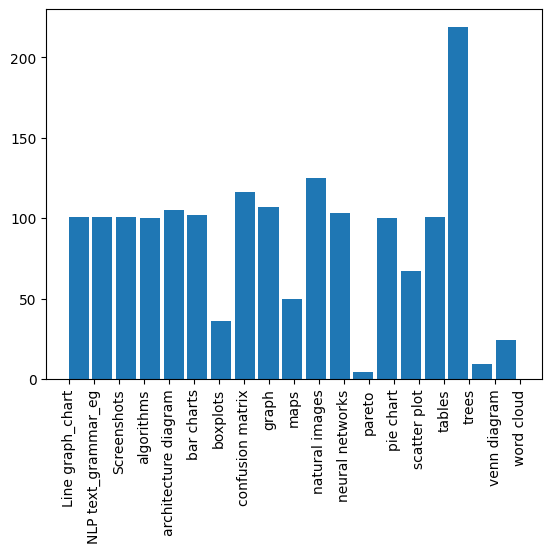

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/lstr/sahara/datalab-ml/z1974769/scientific_figures_pilot.csv")
plt.hist(sorted(df["label"]), bins = len(df["label"].unique()), width=0.8)
plt.xticks(rotation=90)

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("/lstr/sahara/datalab-ml/z1974769/outputs_pdffigures/real_outputs/all_files_data_combined_with_predictions.csv")

In [2]:
df1

,imageText,name,page,figType,captionBoundary,renderDpi,renderURL,regionBoundary,caption,Fig_name,Swin_prediction,Swin_confidence,Goolge_ViT_prediction,Goolge_ViT_confidence
0,"['Γ⇒', '∆;Π', 'N', '−', 'cut', 'Γ⇒', '∆,', 'x'...",3,14,Figure,"{'x1': 124.79974365234375, 'x2': 470.477355957...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 128.64, 'x2': 483.35999999999996, 'y1':...",Figure 3: Ecumenical pure modal system labEK. ...,figure_images2204.02076-Figure3-1.png,trees,0.558751,scatter plot,0.086721
1,"['Γ⇒', '∆;Π', 'N', '−', 'cut', 'Γ⇒', '∆,N;Π∗',...",2,6,Figure,"{'x1': 124.80010986328125, 'x2': 468.516174316...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 145.92, 'x2': 446.88, 'y1': 447.84, 'y2...",Figure 2: Ecumenical pure system LCE. In rules...,figure_images2204.02076-Figure2-1.png,trees,0.488079,boxplots,0.100870
2,"['∆1{', 'A•,', '[A•,∆2]}', '∆1{', 'A•,', '[∆2]...",5,21,Figure,"{'x1': 219.60032653808594, 'x2': 373.651062011...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 123.83999999999999, 'x2': 473.76, 'y1':...",Figure 5: Intuitionistic fragment nEKi.,figure_images2204.02076-Figure5-1.png,tables,0.883903,trees,0.176683
3,"['Γ⊥', '◦', '{P▽}', 'D', 'Λ{N▽,⊥◦}', 'Λ{N◦}', ...",6,21,Figure,"{'x1': 226.56011962890625, 'x2': 366.810882568...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 148.79999999999998, 'x2': 453.12, 'y1':...",Figure 6: Classical fragment nEKc.,figure_images2204.02076-Figure6-1.png,tables,0.953753,NLP text_grammar_eg,0.209699
4,"['4', ':', 'A→', 'A', '∧', '♦♦A→', '♦A', 'Tran...",1,22,Table,"{'x1': 170.16000366210938, 'x2': 423.209594726...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 123.83999999999999, 'x2': 470.4, 'y1': ...",Table 1: Axioms and corresponding first-order ...,figure_images2204.02076-Table1-1.png,tables,0.997770,NLP text_grammar_eg,0.114627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37726,"['CPH', '74.34', '(73.97,', '74.71)', '82.79',...",4,16,Table,"{'x1': 133.46400451660156, 'x2': 477.783142089...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 543.36, 'y2...",Table 4: The CIec values (%) of the compared m...,figure_images2203.00144-Table4-1.png,NLP text_grammar_eg,0.701335,NLP text_grammar_eg,0.180838
37727,"['CPH', '56.38', '(56.08,', '56.65)', '57.48',...",3,16,Table,"{'x1': 133.46400451660156, 'x2': 477.785766601...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 365.76, 'y2...",Table 3: The CIee values (%) of the compared m...,figure_images2203.00144-Table3-1.png,NLP text_grammar_eg,0.776761,tables,0.295294
37728,"['CPH', '72.91', '(72.57,', '73.25)', '78.37',...",2,16,Table,"{'x1': 133.46400451660156, 'x2': 477.482330322...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 132.96, 'x2': 478.08, 'y1': 188.64, 'y2...",Table 2: The C-index (CI) values (%) of the co...,figure_images2203.00144-Table2-1.png,NLP text_grammar_eg,0.709978,tables,0.278061
37729,"['SurVED', 'DeepSurv', 'DeepHit', 'DATE', 'VSI...",3,19,Figure,"{'x1': 133.54800415039062, 'x2': 478.472991943...",150,/lstr/sahara/datalab-ml/z1974769/outputs_pdffi...,"{'x1': 136.79999999999998, 'x2': 479.52, 'y1':...",Figure 3: The change of CI as the size of the ...,figure_images2203.00144-Figure3-1.png,Line graph_chart,0.991793,Line graph_chart,0.248897


In [6]:
len(df1[df1["Fig_name"].str.contains("Table")])

11289

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Line graph_chart'),
  Text(1, 0, 'NLP text_grammar_eg'),
  Text(2, 0, 'Screenshots'),
  Text(3, 0, 'algorithms'),
  Text(4, 0, 'architecture diagram'),
  Text(5, 0, 'bar charts'),
  Text(6, 0, 'boxplots'),
  Text(7, 0, 'confusion matrix'),
  Text(8, 0, 'graph'),
  Text(9, 0, 'maps'),
  Text(10, 0, 'natural images'),
  Text(11, 0, 'neural networks'),
  Text(12, 0, 'pareto'),
  Text(13, 0, 'pie chart'),
  Text(14, 0, 'scatter plot'),
  Text(15, 0, 'tables'),
  Text(16, 0, 'trees'),
  Text(17, 0, 'venn diagram'),
  Text(18, 0, 'word cloud')])

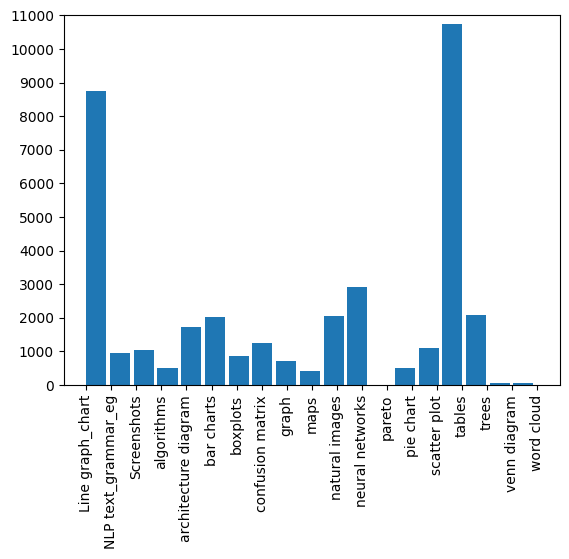

In [8]:
import matplotlib.pyplot as plt
plt.hist(sorted(df1["Swin_prediction"]), bins = len(df1["Swin_prediction"].unique()), width=0.8)
plt.ylim(0, 11000)
plt.yticks(range(0, 11001, 1000))
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Line graph_chart'),
  Text(1, 0, 'NLP text_grammar_eg'),
  Text(2, 0, 'Screenshots'),
  Text(3, 0, 'algorithms'),
  Text(4, 0, 'architecture diagram'),
  Text(5, 0, 'bar charts'),
  Text(6, 0, 'boxplots'),
  Text(7, 0, 'confusion matrix'),
  Text(8, 0, 'graph'),
  Text(9, 0, 'maps'),
  Text(10, 0, 'natural images'),
  Text(11, 0, 'neural networks'),
  Text(12, 0, 'pie chart'),
  Text(13, 0, 'scatter plot'),
  Text(14, 0, 'tables'),
  Text(15, 0, 'trees'),
  Text(16, 0, 'venn diagram'),
  Text(17, 0, 'word cloud')])

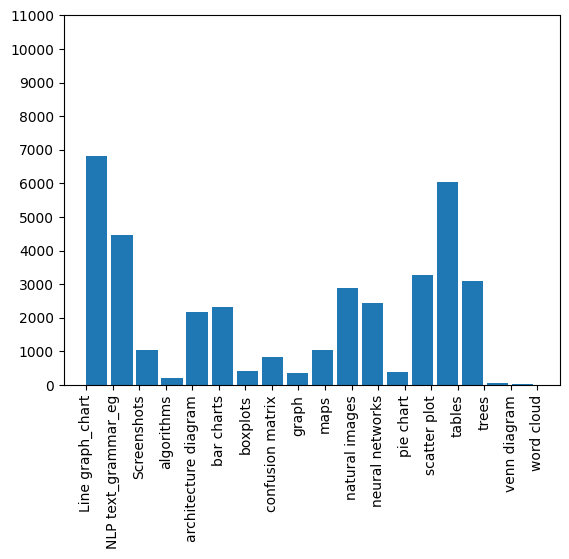

In [9]:
plt.hist(sorted(df1["Goolge_ViT_prediction"]), bins = len(df1["Goolge_ViT_prediction"].unique()), width=0.8)
plt.ylim(0, 11000)
plt.yticks(range(0, 11001, 1000))
plt.xticks(rotation=90)

In [10]:
len(df1)

37731

In [8]:
print('              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95        20\n           1       0.82      0.90      0.86        20\n           2       0.95      0.95      0.95        20\n           3       0.77      0.85      0.81        20\n           4       0.94      0.81      0.87        21\n           5       0.95      0.95      0.95        21\n           6       0.75      0.43      0.55         7\n           7       0.96      1.00      0.98        23\n           8       0.92      1.00      0.96        22\n           9       1.00      0.90      0.95        10\n          10       0.96      1.00      0.98        25\n          11       0.72      1.00      0.84        21\n          12       1.00      1.00      1.00         1\n          13       1.00      1.00      1.00        20\n          14       1.00      1.00      1.00        13\n          15       1.00      0.75      0.86        20\n          16       0.97      0.89      0.93        44\n          17       1.00      0.50      0.67         2\n          18       1.00      0.80      0.89         5\n\n    accuracy                           0.92       335\n   macro avg       0.93      0.88      0.89       335\nweighted avg       0.92      0.92      0.91       335\n')

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.82      0.90      0.86        20
           2       0.95      0.95      0.95        20
           3       0.77      0.85      0.81        20
           4       0.94      0.81      0.87        21
           5       0.95      0.95      0.95        21
           6       0.75      0.43      0.55         7
           7       0.96      1.00      0.98        23
           8       0.92      1.00      0.96        22
           9       1.00      0.90      0.95        10
          10       0.96      1.00      0.98        25
          11       0.72      1.00      0.84        21
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        13
          15       1.00      0.75      0.86        20
          16       0.97      0.89      0.93        44
          17       1.00    

In [9]:
df2 = pd.read_csv("/lstr/sahara/datalab-ml/z1974769/scientific_figures_pilot.csv")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Line graph_chart'),
  Text(1, 0, 'NLP text_grammar_eg'),
  Text(2, 0, 'Screenshots'),
  Text(3, 0, 'algorithms'),
  Text(4, 0, 'architecture diagram'),
  Text(5, 0, 'bar charts'),
  Text(6, 0, 'boxplots'),
  Text(7, 0, 'confusion matrix'),
  Text(8, 0, 'graph'),
  Text(9, 0, 'maps'),
  Text(10, 0, 'natural images'),
  Text(11, 0, 'neural networks'),
  Text(12, 0, 'pareto'),
  Text(13, 0, 'pie chart'),
  Text(14, 0, 'scatter plot'),
  Text(15, 0, 'tables'),
  Text(16, 0, 'trees'),
  Text(17, 0, 'venn diagram'),
  Text(18, 0, 'word cloud')])

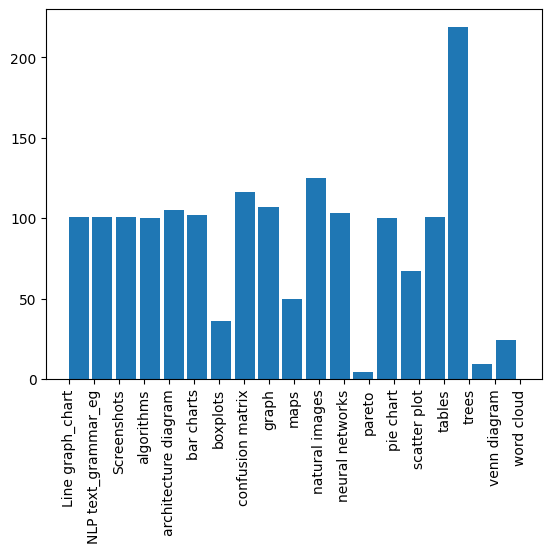

In [12]:
import matplotlib.pyplot as plt
plt.hist(sorted(df2["label"]), bins = len(df2["label"].unique()), width=0.8)
# plt.ylim(0, 11000)
# plt.yticks(range(0, 11001, 1000))
plt.xticks(rotation=90)